
# Lesson 5 - Logistic Regression


In [1]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Mar  8 11:53:08 2020

@author: yosi
"""

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression,Ridge, LogisticRegression
import math
from scipy.special import expit
from sklearn.model_selection import train_test_split

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


[[1.        0.9247563]
 [0.9247563 1.       ]]
[[1.         0.69107204]
 [0.69107204 1.        ]]
[[1.         0.79672335]
 [0.79672335 1.        ]]


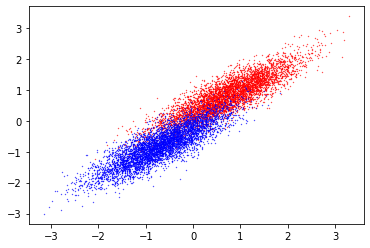

In [4]:
table = pd.read_csv('/content/gdrive/MyDrive/Machon Lev/ML_5783/Materials/Intel-ML101-Class4/data/weight-height.csv')
table['Gender'].replace(['Female','Male'],[0,1],inplace=True)
X = table[['Height','Weight']]
y = table['Gender']
#normalize X
X = (X-np.mean(X))/np.std(X)
X = X.values
y = y.values


#EDA
print(np.corrcoef(X[:,0],X[:,1]))
print(np.corrcoef(X[:,0],y))
print(np.corrcoef(X[:,1],y))
plt.scatter(X[y==1,0],X[y==1,1],c='r',s=0.1)
plt.scatter(X[y==0,0],X[y==0,1],c='b',s=0.1)
#both height and weight correlate positive with gender and are very correlated
#weight is more important
#when combined the height weight has negative value because they are correlated
 

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

#try with skleaarn logistic classifier
clf = LogisticRegression().fit(X_train, y_train)
score = clf.score(X_test,y_test)
print('score = ',score)
print('weights = ',clf.coef_[0])
print('intercept = ',clf.intercept_)

score =  0.9206060606060606
weights =  [-1.8341555   6.16417939]
intercept =  [0.03015013]


In [38]:
clf.predict_proba(X_test)

array([[0.23760592, 0.76239408],
       [0.00481711, 0.99518289],
       [0.1543754 , 0.8456246 ],
       ...,
       [0.99526281, 0.00473719],
       [0.96848611, 0.03151389],
       [0.92048589, 0.07951411]])

##Let's generate the probability for the first example from the formula

In [40]:
from scipy.special import expit #sigmoid
weights = clf.coef_[0]
x = X_test[0]

expit( np.dot(x,weights) + clf.intercept_ ) 

array([0.76239408])

## Why height has a negative weight in th regression if it correlates positive with male? 

## you should be wary of interpreting raw correlations when other important variables exist. If the positively-correlated regressor is the only regressor in a linear model then its coefficient should be positive. But if there are several regressors and they are not independent it may not happen.

## It also depends on the level of regularization applied (later on)

In [41]:
#implementation from scratch

def cost_function(X,y,y_pred):  #loss calculation (green in our ppt)
    return(-1/X.shape[0])*sum(y*np.log(y_pred)+(1-y)*np.log(1 - y_pred))

def logistic_regression(features, target, num_steps, learning_rate):
    cost = []
    #We won't use intercept here (we suppose mean(y)=0)   
    weights = np.zeros(features.shape[1])
    
    for step in range(num_steps):
        scores = np.dot(features, weights)# linear regression module (pink in our ppt)
        predictions = expit(scores) #activation function (red in our ppt)

        # Update weights with gradient
        output_error_signal = target - predictions
        gradient = 2/features.shape[0]*np.dot(features.T, output_error_signal)
        weights += learning_rate * gradient
        cost.append(cost_function(X,target,predictions))
    return weights,cost

weights =  [-1.88712915  6.25854703]
test cost =  0.20657551291624704
score =  0.9203030303030303


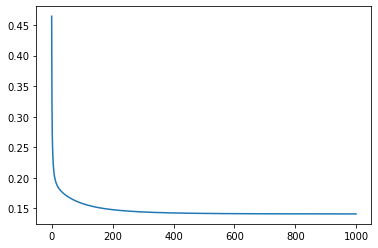

In [59]:
weights,cost = logistic_regression(X_train,y_train,1000,0.5)
print('weights = ',weights)
#predicted values
y_ = expit(np.dot(X_test,weights))
print('test cost = ',cost_function(X_test,y_test,y_))

#now let's threshold to obtain the male\female classes
y_th = y_>0.5
score = np.mean(y_test==y_th)
print('score = ',score)
plt.plot(cost)

In [48]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

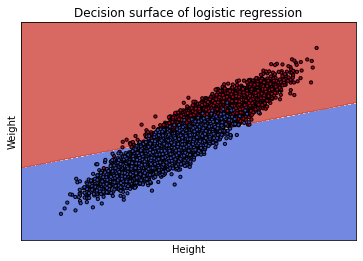

0.9206060606060606
[[-1.8341555   6.16417939]]


In [57]:
#Regularization. The parameter C:
#C = float, default=1.0
#Inverse of regularization strength; must be a positive float.
#For no regularization use high C or penalty='none'
#smaller values specify stronger regularization.


clf = LogisticRegression(random_state=0, C=1).fit(X_train, y_train)
fig, ax = plt.subplots()
# title for the plots
title = ('Decision surface of logistic regression')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=10, edgecolors='k')
ax.set_ylabel('Weight')
ax.set_xlabel('Height')
ax.set_xticks(())
ax.set_yticks(())
ax.set_title(title)
plt.show()
print(clf.score(X_test,y_test))
print(clf.coef_)

# Note that for higher regularization (lower C), the model becomes more "general", performance decreases and the weights are now both positively correlated